In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline


In [2]:
train = pd.read_csv('train_qnU1GcL.csv')
test = pd.read_csv('test_LxCaReE_DvdCKVT_v2s0Z4r.csv')

In [3]:
train.shape, test.shape

((79853, 12), (34224, 11))

In [4]:
train.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,1


In [5]:
test.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type
0,649,0.001,27384,51150,0.0,0.0,0.0,99.89,7,A,Rural
1,81136,0.124,23735,285140,0.0,0.0,0.0,98.93,19,A,Urban
2,70762,1.000,17170,186030,0.0,0.0,0.0,NaN,2,B,Urban
3,53935,0.198,16068,123540,0.0,0.0,0.0,99.00,11,B,Rural
4,15476,0.041,10591,200020,1.0,0.0,0.0,99.17,14,A,Rural


In [6]:
train.dtypes

id                                    int64
perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                     object
residence_area_type                  object
target                                int64
dtype: object

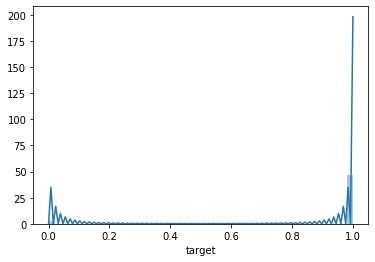

In [7]:
sn.distplot(train['target'])

In [8]:
train.isnull().sum()


id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
target                                 0
dtype: int64

In [9]:
test.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 31
Count_6-12_months_late                31
Count_more_than_12_months_late        31
application_underwriting_score      1323
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
dtype: int64

In [10]:
train=pd.get_dummies(train)

In [11]:
test=pd.get_dummies(test)

In [12]:
train.fillna(0,inplace=True)

In [13]:
train.isnull().sum()

id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
target                              0
sourcing_channel_A                  0
sourcing_channel_B                  0
sourcing_channel_C                  0
sourcing_channel_D                  0
sourcing_channel_E                  0
residence_area_type_Rural           0
residence_area_type_Urban           0
dtype: int64

In [14]:
test.fillna(0,inplace=True)

In [15]:
test.isnull().sum()

id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel_A                  0
sourcing_channel_B                  0
sourcing_channel_C                  0
sourcing_channel_D                  0
sourcing_channel_E                  0
residence_area_type_Rural           0
residence_area_type_Urban           0
dtype: int64

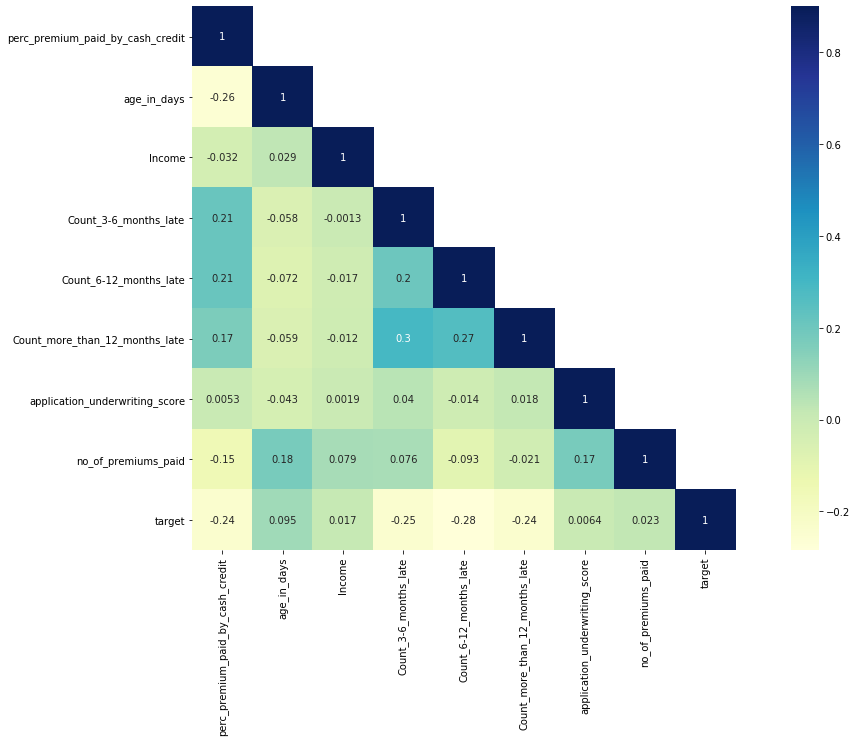

In [16]:
corr = train[["perc_premium_paid_by_cash_credit","age_in_days","Income","Count_3-6_months_late","Count_6-12_months_late","Count_more_than_12_months_late","application_underwriting_score","no_of_premiums_paid","target"]].corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

In [17]:
X_train=train.drop('target',axis=1)

In [18]:
Y_train=train['target']

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
logreg = LogisticRegression()


In [21]:
logreg.fit(X_train,Y_train)

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
pred=logreg.predict(test)

In [23]:
pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [24]:
logreg.score(X_train,Y_train)

0.937409990858202

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [26]:
model = KNeighborsClassifier()

In [27]:
model.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [28]:
predict_train = model.predict(X_train)

In [29]:
accuracy_score(Y_train,predict_train)

0.9380361414098406

In [30]:
predict_test = model.predict(test)

In [31]:
predict_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [32]:
submission_proj6 = pd.DataFrame()

In [33]:
submission_proj6['id'] = test['id']
submission_proj6['target'] = predict_test

In [34]:
submission_proj6.to_csv('submission_proj6.csv', header=True, index=False)